In [27]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import sys
sys.path.insert(0, "..")
from classes.stat_phys.potentials1 import H_pot_direct_integration as H_pot_int
from classes.stat_phys.potentials1 import H_plain_MonteCarlo as H_pot_mont
from classes.stat_phys.potentials1 import H_pot_ref as H_ref
plt.rc('animation', html='jshtml')

In [61]:
ks = [1.0, 10.0]
x_0s = [0.0, 1.0]
Ns = [550000, 100000]


Hs_mont = []
def Y(x, T, k, x_0):
    return np.exp(-1.0/2.0*k*(x-x_0)**2/T)

def v_fun(x, k, x_0):
    return 1.0/2.0*k*(x-x_0)**2

ks = [1.0, 10.0]
x0s = [0.0,1.0]
T = 0.15

for k, x0, N in zip(ks, x0s,[100000, 10000]):
    v_fun_args = {"k":k, "x_0":x0}
    y_args = {"T":T,"k":k, "x_0":x0}
    h = H_pot_mont(T=T, v_func=v_fun, v_func_args=v_fun_args, Y=Y, Y_args=y_args, N=N)
    Hs_mont.append(h)

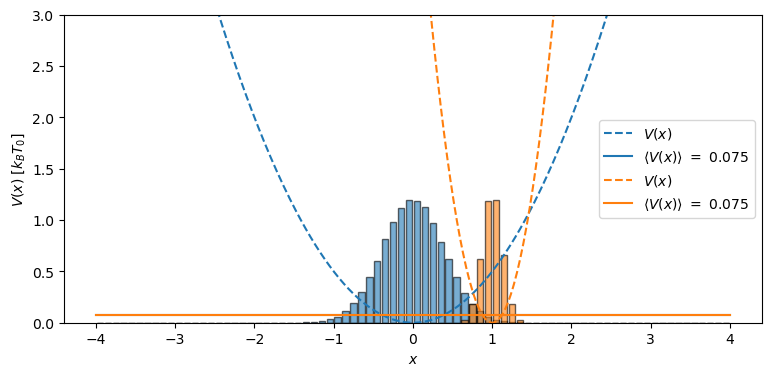

In [62]:
fig, ax = plt.subplots(figsize=(9,4))
x_lims = [[-2,2],[-1,3],[-1,1]]
y_lims = [[0,2], [0,2], [0,5]]
colors_tot = [
    { "v_avg": "C0","v_func": "C0" },
    { "v_avg": "C1","v_func": "C1" }]

for pot, colors in zip(Hs_mont, colors_tot):
    ax.grid()
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$V(x)$ $[k_BT_0]$")
    #ax.set_xlim(x_lim)
    ax.set_ylim([0.0, 3.0])
    pot.plot(ax, bin_size=0.1, colors=colors)
    ax.legend()

In [72]:
sample_size = np.arange(1000, 1000000, 10000)
v_avgs = []
for N_sampling in sample_size:
    h = H_pot_mont(T=0.15, v_func=v_fun, v_func_args={"k":1.0, "x_0":0.0}, Y=Y, Y_args={"T":0.15,"k":1.0, "x_0":0.0}, N=N_sampling)
    h.get_pdist()
    h_ref = H_ref(H_pot_ref=h, T=0.15, v_func=v_fun, v_func_args={"k":10.0, "x_0":1.0})
    v_avgs.append(h_ref.get_v_avg())
#np.savetxt("v_avgs.txt", np.array([sample_size, np.array(v_avgs)]).T)

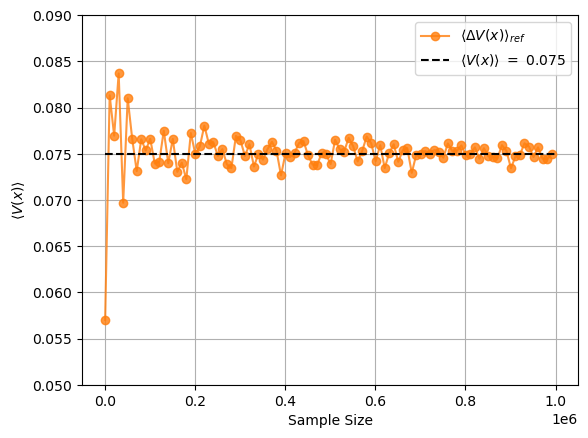

In [104]:
fig, ax = plt.subplots()
ax.grid()
ax.set_ylim([0.050, 0.09])
ax.set_xlabel("Sample Size")
ax.set_ylabel(r"$\left\langle V(x) \right\rangle$")
#ax.set_xlim([min(sample_size)-100000, max(sample_size)+200000])
ax.plot(sample_size, v_avgs, "o-", color="C1", alpha=0.8, label=r"$\left\langle \Delta V(x) \right\rangle_{ref}$")
ax.hlines(Hs_mont[0].get_v_avg(), xmin=0.0, xmax=1e6, colors="k", linestyles="--", label=r"$\left\langle V(x) \right\rangle$ $=$"+f" {round(Hs_mont[0].get_v_avg(),3)}")
ax.legend()